In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\hubgi\Desktop\Data mining\AIDS_prediction\data\AIDS_Classification.csv")

In [3]:
df.columns

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820',
       'infected'],
      dtype='object')

In [4]:
df['infected'].describe()
df.drop(["str2","z30","treat","cd420","cd820"],axis=1,inplace = True)

In [5]:
from sklearn.model_selection import train_test_split
X = df.drop('infected', axis=1)
y = df['infected']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Drzewa

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import  plot_tree
import matplotlib.pyplot as plt

Drzewo 1

In [42]:
#Drzewo 1 
#Zbiór uczący
drzewo1 = DecisionTreeClassifier(random_state=1)
drzewo1.fit(X_train, y_train)
y_pred_train_1 = drzewo1.predict(X_train)
classification_report_1_train = classification_report(y_train, y_pred_train_1)
print(classification_report_1_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1309
           1       1.00      1.00      1.00       402

    accuracy                           1.00      1711
   macro avg       1.00      1.00      1.00      1711
weighted avg       1.00      1.00      1.00      1711



In [43]:
#zbior testowy
y_pred_test_1 = drzewo1.predict(X_test)
classification_report_1_test = classification_report(y_test, y_pred_test_1)
print(classification_report_1_test)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       309
           1       0.70      0.67      0.69       119

    accuracy                           0.83       428
   macro avg       0.79      0.78      0.78       428
weighted avg       0.83      0.83      0.83       428



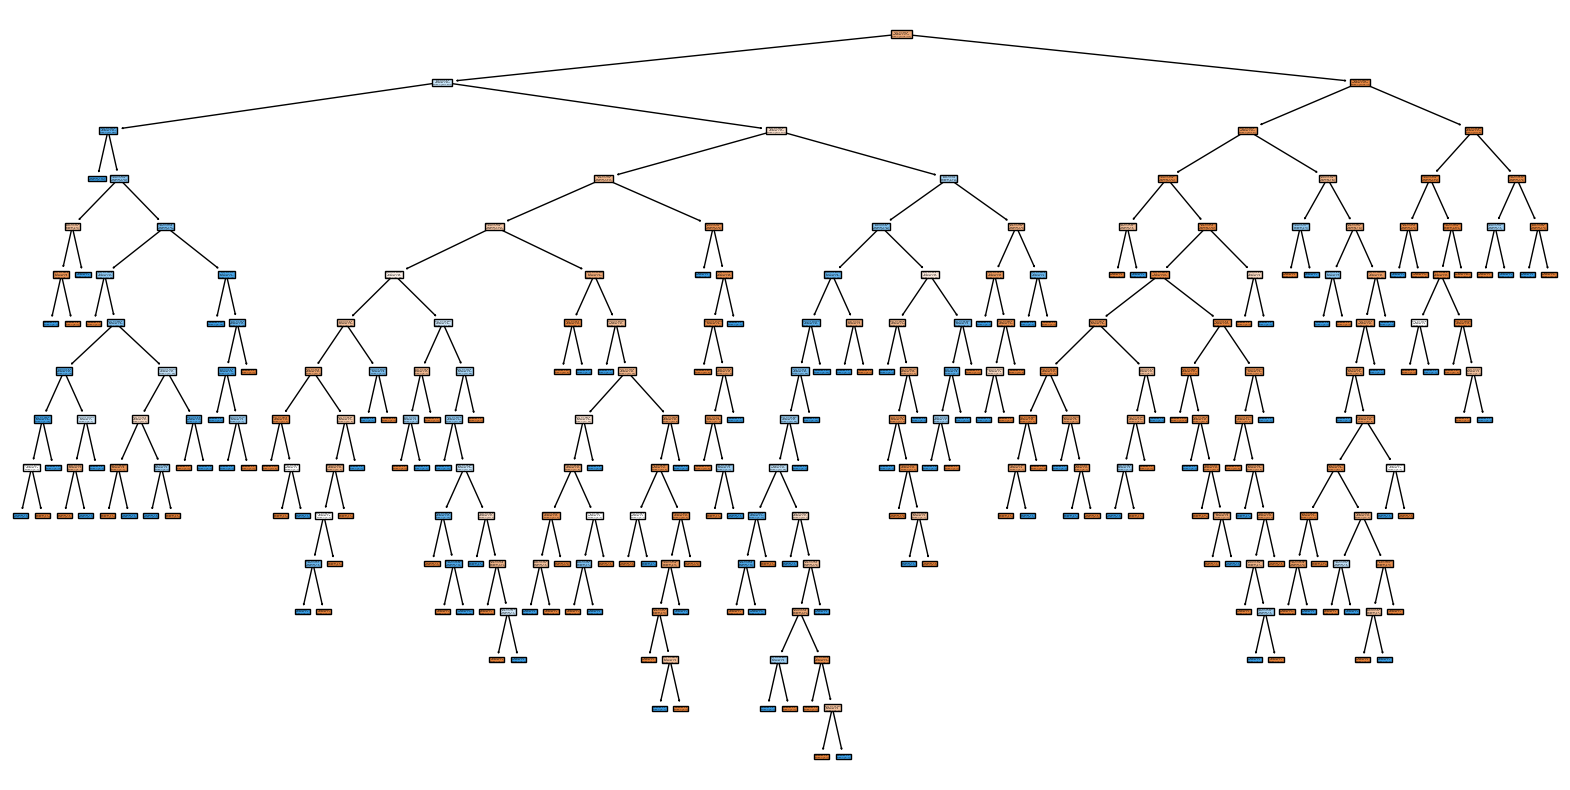

In [9]:
plt.figure(figsize=(20,10))
plot_tree(drzewo1, filled=True)
plt.show()

Cost pruning 

In [44]:
path1 = drzewo1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas_ = path1.ccp_alphas
drzewa_ = []
for ccp_alpha1 in ccp_alphas_:
    drzewo1_ = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha1)
    drzewo1_.fit(X_train, y_train)
    drzewa_.append(drzewo1_)

In [56]:
ccp_alphas = ccp_alphas_[:-1]
print   (ccp_alphas)

[0.         0.00046619 0.0005114  0.00052601 0.00052601 0.00052601
 0.00053132 0.00053149 0.00054549 0.00054549 0.000551   0.00056197
 0.00056674 0.00058035 0.00063559 0.00071138 0.00077927 0.00077927
 0.00077927 0.00077927 0.00078795 0.00079551 0.00086619 0.00087668
 0.00087668 0.00087668 0.00088526 0.0008953  0.00092096 0.00093513
 0.00093513 0.00095461 0.00097409 0.00098208 0.00098908 0.00100192
 0.00102279 0.00103903 0.00104619 0.00105202 0.00105413 0.00105783
 0.00109159 0.00110419 0.00112395 0.00128971 0.00133847 0.00143191
 0.00154996 0.00155854 0.0015655  0.00162385 0.00163499 0.00165618
 0.00166987 0.00174163 0.00175336 0.00178375 0.00188382 0.00203852
 0.00207806 0.00212189 0.00216289 0.00235469 0.00236602 0.00297689
 0.00335896 0.00352661 0.00365787 0.00501399 0.00533427 0.0131921
 0.03202409]


In [46]:
drzewa = drzewa_[:-1]

Drzewo 2

In [47]:
#Zbiór uczący
drzewo2 = drzewa[-1]
y_pred_train_2 = drzewo2.predict(X_train)
classification_report_2_train = classification_report(y_train, y_pred_train_2)
print(classification_report_2_train)

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1309
           1       0.87      0.47      0.61       402

    accuracy                           0.86      1711
   macro avg       0.86      0.72      0.76      1711
weighted avg       0.86      0.86      0.84      1711



In [48]:
#Zbiór testowy
y_pred_test_2 = drzewo2.predict(X_test)
classification_report_2_test = classification_report(y_test, y_pred_test_2)
print(classification_report_2_test)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       309
           1       0.84      0.50      0.62       119

    accuracy                           0.83       428
   macro avg       0.84      0.73      0.76       428
weighted avg       0.84      0.83      0.82       428



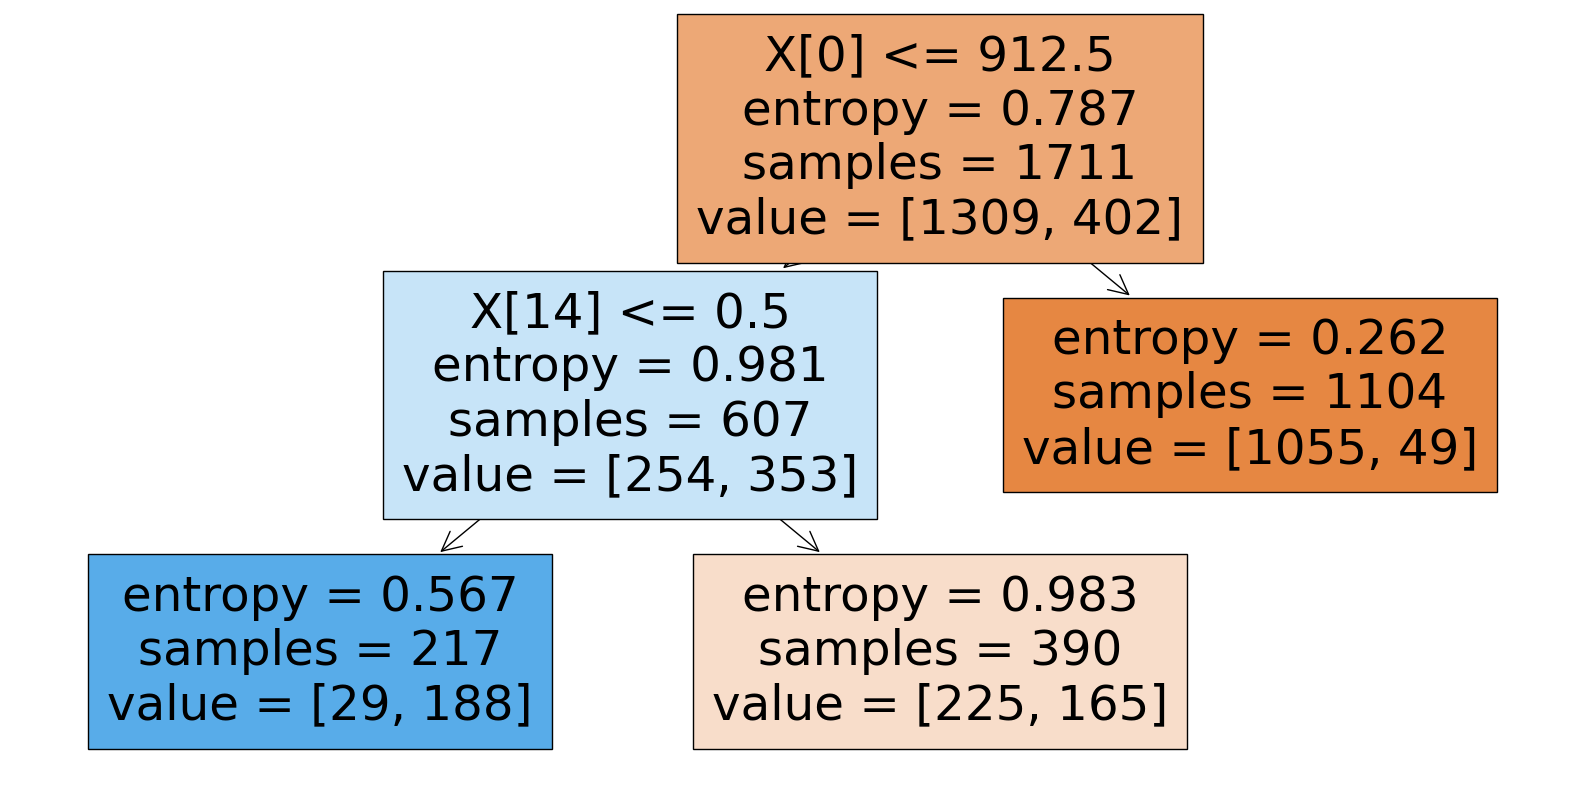

In [49]:
plt.figure(figsize=(20,10))
plot_tree(drzewo2, filled=True)
plt.show()

Drzewo 3

In [50]:
#Zbiór uczący
drzewo3 = drzewa[-18]
y_pred_train_3 = drzewo3.predict(X_train)
classification_report_3_train = classification_report(y_train, y_pred_train_3)
print(classification_report_3_train)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1309
           1       0.98      0.97      0.97       402

    accuracy                           0.99      1711
   macro avg       0.98      0.98      0.98      1711
weighted avg       0.99      0.99      0.99      1711



In [51]:
#Zbiór testowy
y_pred_test_3 = drzewo3.predict(X_test)
classification_report_3_test = classification_report(y_test, y_pred_test_3)
print(classification_report_3_test)

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       309
           1       0.75      0.68      0.71       119

    accuracy                           0.85       428
   macro avg       0.82      0.80      0.81       428
weighted avg       0.84      0.85      0.85       428



In [52]:
plt.figure(figsize=(20,10))
plot_tree(drzewo3, filled=True)
plt.show()

KeyboardInterrupt: 

Drzewo 4

In [53]:
from sklearn.model_selection import GridSearchCV
param_grid = {"ccp_alpha": [0.0001, 0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(drzewo1, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_ccp_alpha = grid_search.best_params_["ccp_alpha"]
print ("Najlepsza wartość ccp_alpha: {}".format(best_ccp_alpha)) 

Najlepsza wartość ccp_alpha: 0.01


In [54]:
drzewo4 = DecisionTreeClassifier(random_state=42, ccp_alpha=best_ccp_alpha)
drzewo4.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', random_state=42)

In [55]:
#Zbiór uczący
y_pred_train_4 = drzewo4.predict(X_train)
classification_report_4_train = classification_report(y_train, y_pred_train_4)
print(classification_report_4_train)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1309
           1       0.78      0.70      0.74       402

    accuracy                           0.88      1711
   macro avg       0.84      0.82      0.83      1711
weighted avg       0.88      0.88      0.88      1711



In [22]:
#Zbiór testowy
y_pred_test_4 = drzewo4.predict(X_test)
classification_report_4_test = classification_report(y_test, y_pred_test_4)
print(classification_report_4_test)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       309
           1       0.77      0.66      0.71       119

    accuracy                           0.85       428
   macro avg       0.83      0.79      0.81       428
weighted avg       0.85      0.85      0.85       428



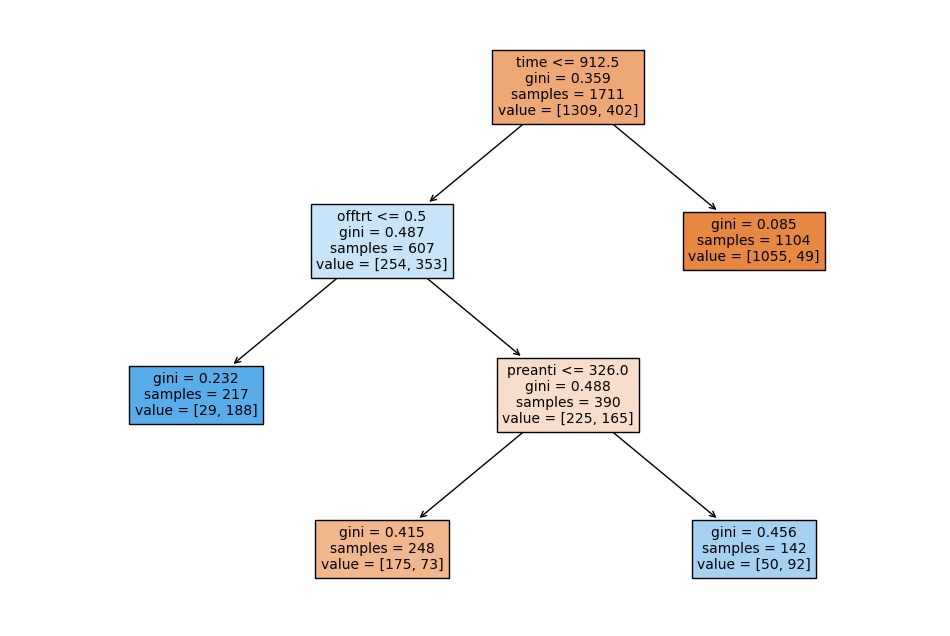

In [23]:
plt.figure(figsize=(12, 8))
plot_tree(drzewo4, filled=True, feature_names=list(X.columns), fontsize=10)
plt.show()

Drzewo 5

In [24]:
drzewo5 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)
drzewo5.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

In [25]:
#Zbiór uczący
y_pred_train_5 = drzewo5.predict(X_train)
classification_report_5_train = classification_report(y_train, y_pred_train_5)
print(classification_report_5_train)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1309
           1       0.78      0.70      0.74       402

    accuracy                           0.88      1711
   macro avg       0.84      0.82      0.83      1711
weighted avg       0.88      0.88      0.88      1711



In [26]:
#Zbiór testowy
y_pred_test_5 = drzewo5.predict(X_test)
classification_report_5_test = classification_report(y_test, y_pred_test_5)
print(classification_report_5_test)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       309
           1       0.77      0.66      0.71       119

    accuracy                           0.85       428
   macro avg       0.83      0.79      0.81       428
weighted avg       0.85      0.85      0.85       428



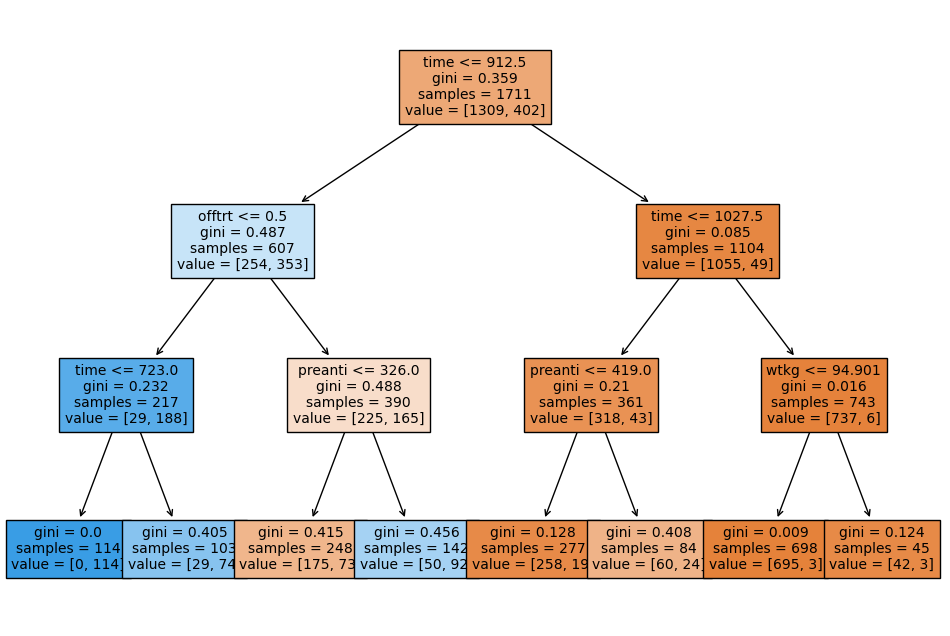

In [27]:
plt.figure(figsize=(12, 8))
plot_tree(drzewo5, filled=True, feature_names=list(X.columns), fontsize=10)
plt.show()

Najlepszy okazał się model 3.

In [28]:
from sklearn.metrics import confusion_matrix

# Wyznaczenie macierzy pomyłek
conf_matrix = confusion_matrix(y_test, y_pred_test_3)

# Wydruk macierzy pomyłek
print("Macierz pomyłek:")
print(conf_matrix)

Macierz pomyłek:
[[282  27]
 [ 35  84]]


In [29]:
from sklearn.metrics import accuracy_score
# Obliczenie odsetka błędnych klasyfikacji
error_rate = 1 - accuracy_score(y_test, y_pred_test_3)
# Wyświetlenie odsetek błędnych klasyfikacji
print("Odsetek błędnych klasyfikacji: {:.2f}%".format(error_rate*100))

Odsetek błędnych klasyfikacji: 14.49%


[[0.95561594 0.04438406]
 [0.95561594 0.04438406]
 [0.4184514  0.5815486 ]]


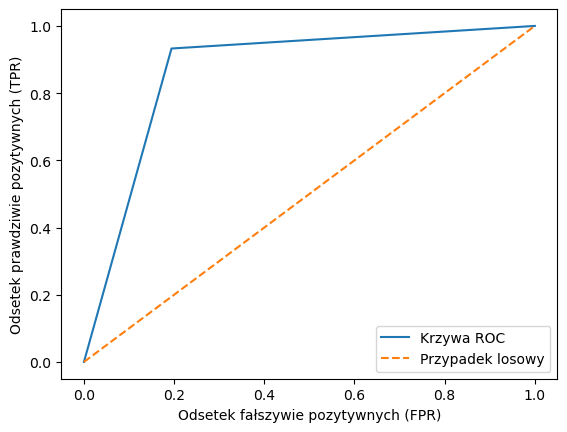

In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score
y_pred_test_2 = drzewo2.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_test_2[:, 1])


fpr, tpr, thresholds = roc_curve(y_test,y_pred_test_2[:, 1])
import matplotlib.pyplot as plt

# Wykres krzywej ROC
plt.plot(fpr, tpr, label='Krzywa ROC')
plt.plot([0, 1], [0, 1], linestyle='--', label='Przypadek losowy')
# Opis osi
plt.xlabel('Odsetek fałszywie pozytywnych (FPR)')
plt.ylabel('Odsetek prawdziwie pozytywnych (TPR)')
# Legenda
plt.legend()
# Wyświetlenie wykresu
plt.show()

In [ ]:
print(drzewo3)
from sklearn.tree import export_text
tree_text = export_text(drzewo3, feature_names=list(X.columns))

# Wyświetl tekstową reprezentację drzewa
print(tree_text)

In [ ]:
# Wykres drzewa
plt.figure(figsize=(12, 8))
plot_tree(drzewo3, filled=True, feature_names=list(X.columns), fontsize=10)
#plot_tree(drzewo5, filled=True, feature_names=list(X.columns), fontsize=10)
plt.show()

In [ ]:
!pip install graphviz
plt.figure(figsize=(20,10))
plot_tree(drzewo3, filled=True)
plt.show()